In [10]:
#importing libraries
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
#creating a data base
data = {'M_height': [58,62,60,64,67,70],'D_height': [60,60,58,60,70,72]}
df = pd.DataFrame(data)

In [11]:
df

,M_height,D_height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


Given a new mother height 63, Use linear regression to predict her daughter’s
height, also optimize the result using Gradient descent algorithm?

In [12]:
#for selecting independentand target varaibles
x=df['M_height']
y=df['D_height']

In [13]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [14]:
#linear  regression
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

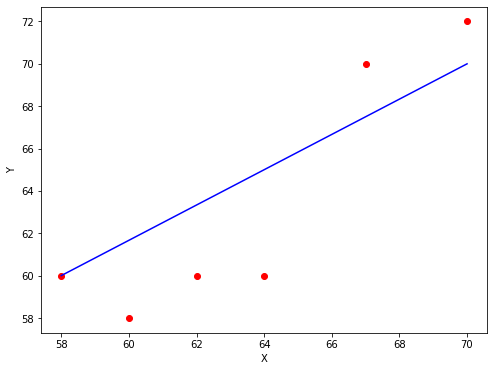

In [17]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(x,y,marker='o',color='red')
plt.plot([min(x), max(x)],[min(y_test),max(y_test)],color='blue',markerfacecolor='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [19]:
#predicting for height 63
model.predict([[63]])

array([62.5])

Iteration 1: Cost 3272.3487666666665, Weight 		0.8272296666666666, Bias 0.021394666666666666
Iteration 2: Cost 124.75111685906859, Weight 		0.9654282779888889, Bias 0.023551237633333333
Iteration 3: Cost 11.081987767210245, Weight 		0.9916908720314763, Bias 0.023952254922014443
Iteration 4: Cost 6.977055751555135, Weight 		0.9966817999186116, Bias 0.02401965706289696
Iteration 5: Cost 6.828813288403584, Weight 		0.9976303847598185, Bias 0.02402366093918468
Iteration 6: Cost 6.823458672129618, Weight 		0.9978107863668818, Bias 0.024015616987213814
Estimated Weight: 0.9978107863668818
Estimated Bias: 0.024015616987213814


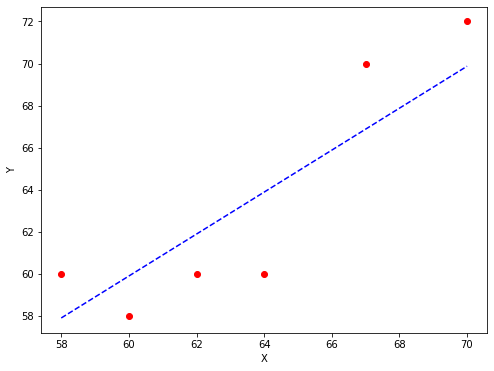

In [20]:
def mean_squared_error(y_true, y_predicted):
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 10, learning_rate = 0.0001,
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
	return current_weight, current_bias

# Data
X = np.array([58,62,60,64,67,70])
Y = np.array([60,60,58,60,70,72])

# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=6)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()